In [1]:
from retrieval import retrivalModel, binary_precision
import random
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
test = retrivalModel('data/full_final_layer_lda.csv', changeParams = [2, 8, 2, 3, 0, 0, 1, .8, .8, 1]) # set to None if 
test.addFeature(("lyrics_clean", 1), "text")
test.createInverseIndex()
randomlist = []
for i in range(0,10):
    n = random.randint(0,300)/100
    randomlist.append(n)
error, bestParams = test.experimentalDescent(["tag"] , randomlist)


3.068508493859523
[2.0, 4.464019007617765, 2.91, 0.05, 6.789624636300626, 0.7, 0.06, 0.46, 1.8851295165413529, 2]
5.79696497455537
[2.0, 10.845303337669531, 2.91, 8.34677336136227, 15.44130176052256, 0.3499999999999999, 0.06, 3.4790734934611542, 1.8851295165413529, 2.0]
0.0004838891108592872
[2.0, 14.907951647788067, 4.655685441591312, 9.265918200678662, 16.294858498077055, 0.3499999999999999, 0.054, 5.193787199949757, 1.8851295165413529, 2.0]
0.0004838891108592872
[2.0, 14.558186149644365, 4.655685441591312, 9.265918200678662, 16.294858498077055, 0.3499999999999999, 0.054, 5.193787199949757, 1.8851295165413529, 2.0]
3.068508493859523
[2.0, 15.117595780012508, 4.131398963786941, 3.8528713541560418, 15.956879487712657, 0.31499999999999995, 0.021599999999999994, 7.2694060887399985, 1.8851295165413529, 2.0]
1.0
[2.0, 13.805836202011257, 4.131398963786941, 3.421281368669693, 15.956879487712657, 0.15749999999999997, 0.012959999999999996, 5.226297944140716, 1.8851295165413529, 1.829114403014

In [ ]:
kmean = pd.read_csv("data/kmeans_groups.csv")
binary = pd.read_csv("data/binary_data.csv")
data = pd.read_csv('data/full_final_layer_lda.csv')
print(data.shape)

In [ ]:
result = []
for i in range(100):
    test.changeParams[5] = i/100
    result.append(binary_precision(25, test)[0])

In [ ]:
plt.plot(range(0,100), result,'b-', label='bertStrength')

In [ ]:
import numpy as np
avgResult = []
for i in range(len(result)-10):
    avgResult.append(np.mean(result[i:i+10]))
avgResultMax = []
for i in range(len(result)-20):
    avgResultMax.append(np.mean(result[i:i+20]))
fig, ax1 = plt.subplots(figsize=(20, 10))
fs = 20
color = 'green'
avgResultMax.reverse()
ax1.set_xlabel('BERT Strength', fontsize=fs)
ax1.set_ylabel('Precision', fontsize=fs)
plt.plot(range(0,30), avgResultMax[:30],'b-', label='bertStrength')    

In [ ]:
num = 429
song = test.getSource().iloc[num]
targetTag = binary.loc[num, 'tag']
#print("For the song {} by, {}".format(song["title"], song["artist"]))
#print('grabs the top related songs based on the top words determined by tf-idf\n')
print(song["lyrics_clean"])
keyWords = [s for n,s in test.queryDataPre(song)]
print('top words: {}\n'.format(keyWords))
print('top words: {}\n'.format([test.extend(x) for x in keyWords]))
result = 0
count = 0
#print(num)
for post in test.query(song):
    #print(post.docid)
    if binary.loc[post.docid, 'tag'] == targetTag:
        result +=1
    querySong = test.getSource().iloc[post.docid]
    #print('song name:{}\nArtist:{}\n'.format(querySong["title"], querySong["artist"]))
    count += 1
#print(result/count)

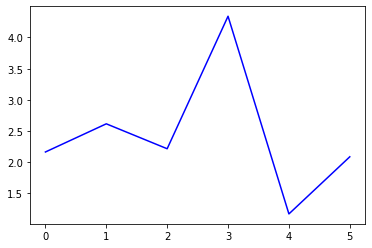

In [4]:
plt.plot(error,'b-',);

In [ ]:
errors = 0
for i in range(200):
    song = test.getSource().iloc[-i]
    query = test.query(song)
    errors += test.categoricalEntropy(song, query, ["0.1" ,"1.1" , "2.1" , "3.1", "4.1", "5.1", "6.1"])
print(errors/200)